### Access the  Dataset

In [66]:
!dir dataset

 Volume in drive C is Windows 
 Volume Serial Number is 6469-4514

 Directory of C:\Users\Amit\Documents\SAI_today\aru_project_tiet_2_python\dataset

25-10-2023  16:57    <DIR>          .
25-10-2023  17:48    <DIR>          ..
25-10-2023  16:57    <DIR>          apple_Black_rot
25-10-2023  16:53         7,993,515 apple_Black_rot-20230918T041332Z-001.zip
25-10-2023  16:57    <DIR>          apple_healthy
25-10-2023  16:54         6,026,763 apple_healthy-20230918T041353Z-001.zip
               2 File(s)     14,020,278 bytes
               4 Dir(s)  159,532,990,464 bytes free


### Import all dependencies

In [105]:
#!pip install opencv-python

In [106]:
#!pip install tensorflow

In [69]:
from __future__ import print_function, division
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob

In [11]:
glob?

### Define Few Parameters

In [70]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224] # feel free to change depending on dataset

# training config:
epochs = 5
batch_size = 32

#define paths

disease_path='dataset/apple_Black_rot'
healthy_path='dataset/apple_healthy'
#disease_path = '/content/drive/MyDrive/apple_data/apple_Black_rot'
#healthy_path = '/content/drive/MyDrive/apple_data/apple_healthy'

# Use glob to grab images from path .jpg or jpeg
disease_files = glob(disease_path + '/*')
healthy_files = glob(healthy_path + '/*')

In [71]:
print(len(disease_files))

410


In [72]:
print(len(healthy_files))

410


In [24]:
#print(healthy_files)

In [73]:
print(type(disease_files))

<class 'list'>


In [74]:
#print(disease_files)

In [25]:
#print(healthy_files)

In [75]:
type(disease_files)

list

### Fetch Images and Class Labels from Files (This might take a while)

In [76]:
# Preparing Labels
disease_labels = []
healthy_labels = []

disease_images=[]
healthy_images=[]

import cv2

for i in range(len(disease_files)):
  image = cv2.imread(disease_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = cv2.applyColorMap(image, cv2.COLORMAP_JET)

  image = cv2.resize(image,(224,224))
  disease_images.append(image)
  disease_labels.append('apple_Black_rot')
for i in range(len(healthy_files)):
  image = cv2.imread(healthy_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = cv2.applyColorMap(image, cv2.COLORMAP_JET)
  image = cv2.resize(image,(224,224))
  healthy_images.append(image)
  healthy_labels.append('apple_healthy')

[link text](https://)### Visualize First 24 Images from Data set

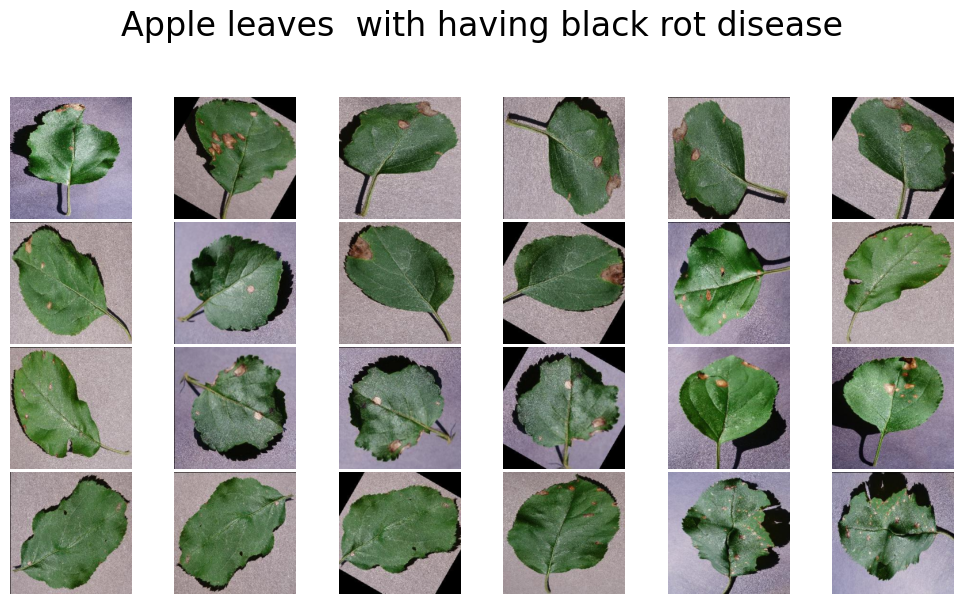

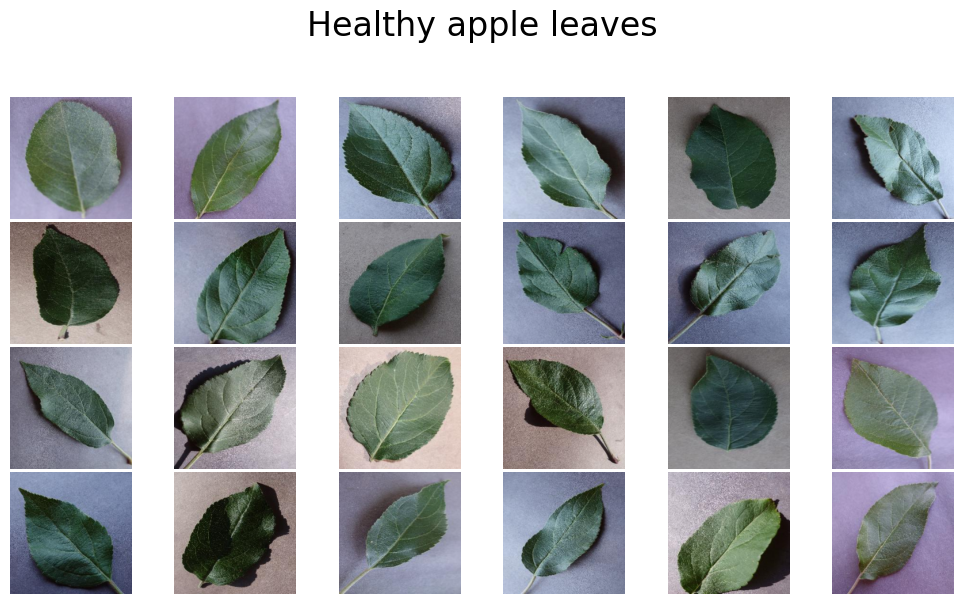

In [77]:
# look at  images for visualization
def plot_images(images, title):
    nrows, ncols = 4, 6
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(disease_images, 'Apple leaves  with having black rot disease')
plot_images(healthy_images, 'Healthy apple leaves')

In [78]:
print(type(disease_images))

<class 'list'>


In [29]:
#print(disease_images[1])

### **Normalization**
#### Model takes images in the form of array of pixels. Hence convert into array and *normalize*

In [79]:
# normalize to interval of [0,1]
disease_images_norm = np.array(disease_images) / 255
healthy_images_norm = np.array(healthy_images) / 255

In [80]:
print(type(disease_images_norm))
#print(disease_images)
#print(disease_images_norm[1])

<class 'numpy.ndarray'>


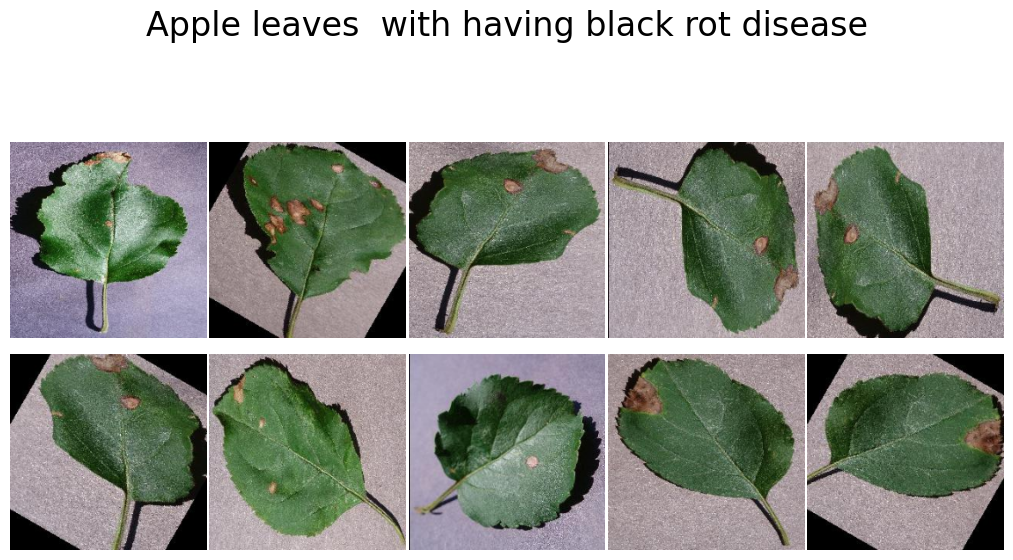

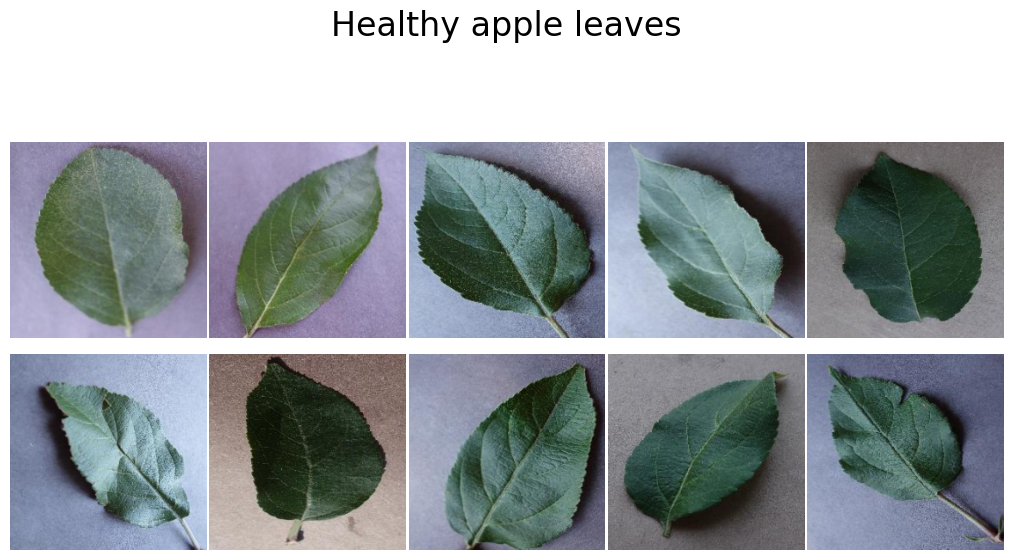

In [81]:
 #look at 10 images for visulazation
def plot_images(images, title):
    nrows, ncols = 2, 5
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(disease_images_norm, 'Apple leaves  with having black rot disease')
plot_images(healthy_images_norm, 'Healthy apple leaves')

In [104]:
 '''#look at  20 images for visualization
def plot_images(images, title):
    nrows, ncols = 4, 5
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(disease_images, 'Apple leaves  with having black rot disease')
plot_images(healthy_images, 'Healthy apple leaves')

'''

"#look at  20 images for visualization\ndef plot_images(images, title):\n   nrows, ncols = 4, 5\n   figsize = [10, 6]\n\n   fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))\n\n   for i, axi in enumerate(ax.flat):\n       axi.imshow(images[i])\n       axi.set_axis_off()\n\n   plt.suptitle(title, fontsize=24)\n   plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])\n   plt.show()\nplot_images(disease_images, 'Apple leaves  with having black rot disease')\nplot_images(healthy_images, 'Healthy apple leaves')\n\n"

### **Train Test Split**

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# split into training and testing
disease_x_train, disease_x_test, disease_y_train, disease_y_test = train_test_split(
    disease_images_norm, disease_labels, test_size=0.2)
healthy_x_train, healthy_x_test, healthy_y_train, healthy_y_test = train_test_split(
    healthy_images_norm, healthy_labels, test_size=0.2)


X_train = np.concatenate((healthy_x_train, disease_x_train), axis=0)
X_test = np.concatenate((healthy_x_test, disease_x_test), axis=0)
y_train = np.concatenate((healthy_y_train, disease_y_train), axis=0)
y_test = np.concatenate((healthy_y_test, disease_y_test), axis=0)

# make labels into categories - either 0 or 1
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

In [84]:
print(type(X_train))
#print(X_train[2])

<class 'numpy.ndarray'>


In [103]:
#print(y_train)

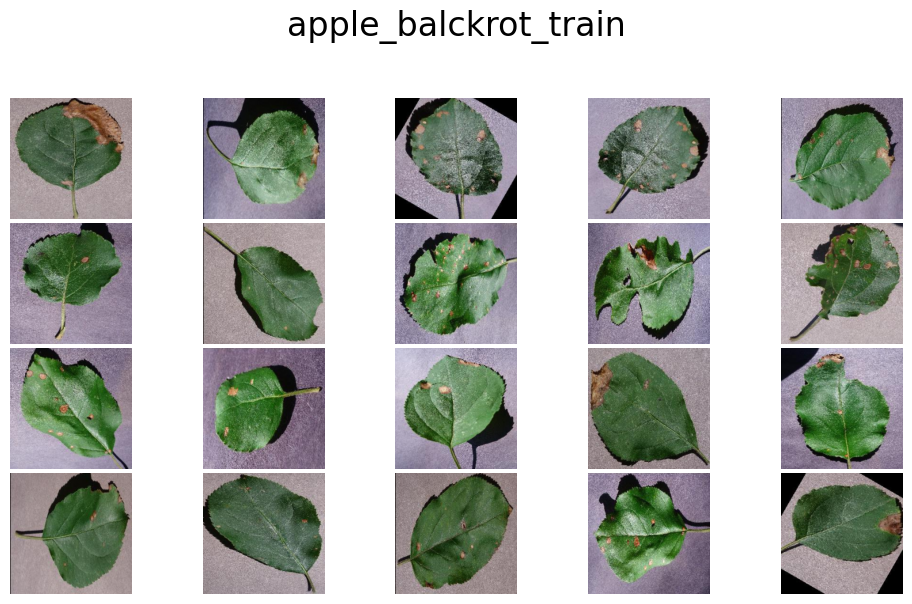

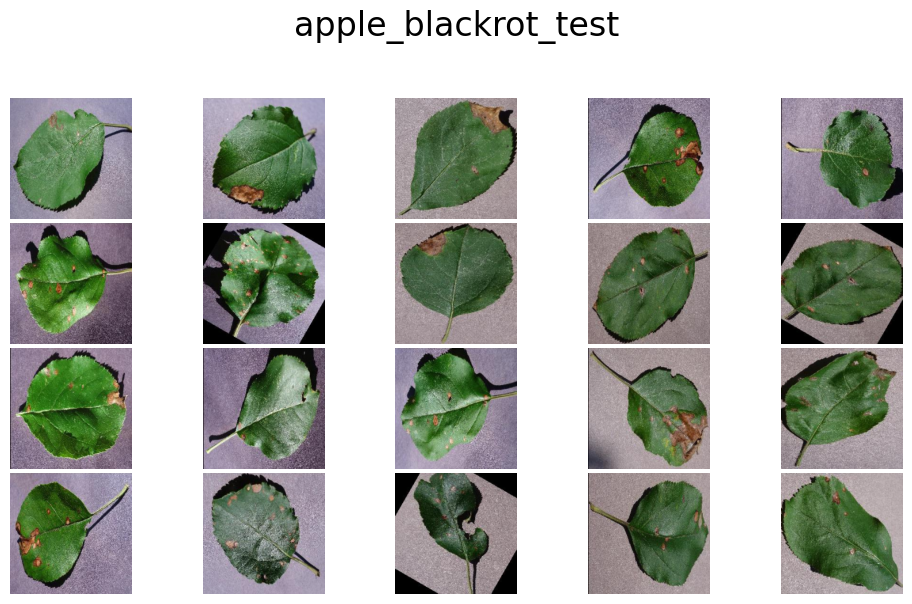

In [85]:
plot_images(disease_x_train, 'apple_balckrot_train')
plot_images(disease_x_test, 'apple_blackrot_test')

In [86]:
#print(y_train[11:29])
#print(type(y_train))
print(y_train.shape)

(656, 2)


In [87]:
print(y_test.shape)

(164, 2)


### Visualize a few images from Training and Test sets

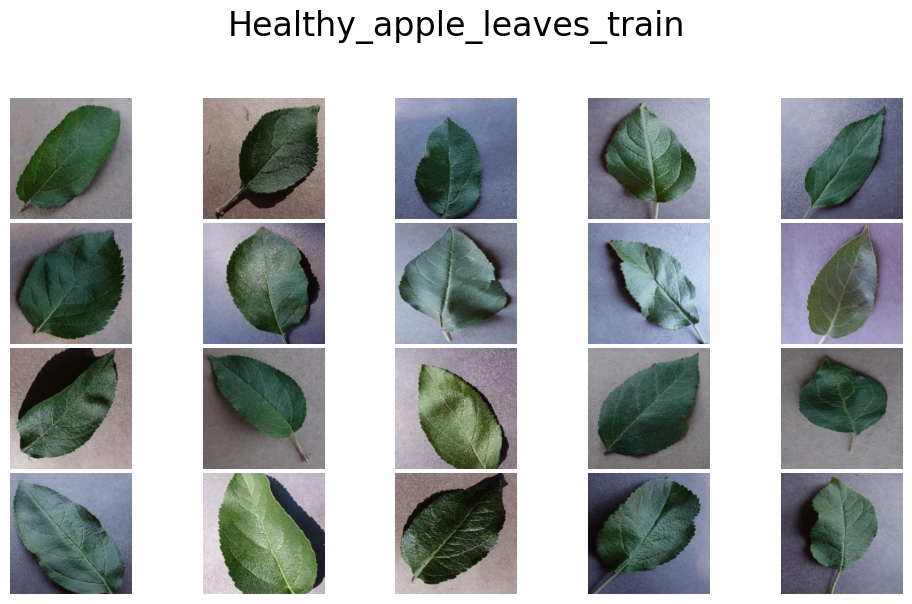

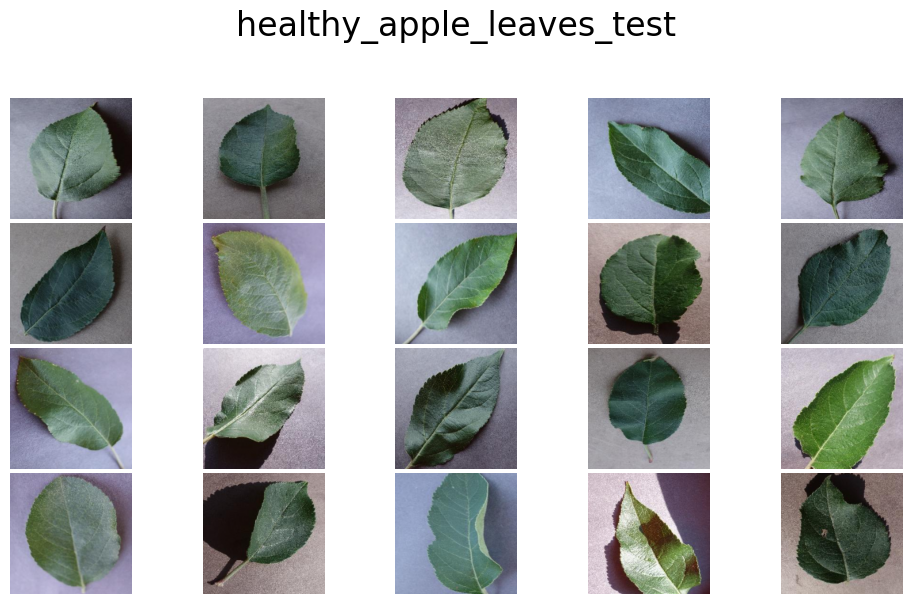

In [88]:
plot_images(healthy_x_train, 'Healthy_apple_leaves_train')
plot_images(healthy_x_test, 'healthy_apple_leaves_test')
# y_train and y_test contain class lables 0 and 1 representing COVID and NonCOVID for X_train and X_test

### **Building and Visualizing model**

In [90]:
inception = InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = inception.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="sigmoid")(outputs)

model = Model(inputs=inception.input, outputs=outputs)

for layer in inception.layers:
    layer.trainable = False

model.compile(
        #loss='categorical_crossentropy',
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
)

train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [89]:
#model.summary()

### **Training the model**

In [91]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=5)

Epoch 1/5
20/20 [==============================] - 30s 1s/step - loss: 1.1209 - accuracy: 0.7957 - val_loss: 0.2506 - val_accuracy: 0.9634
Epoch 2/5
20/20 [==============================] - 28s 1s/step - loss: 0.1529 - accuracy: 0.9619 - val_loss: 0.1636 - val_accuracy: 0.9634
Epoch 3/5
20/20 [==============================] - 28s 1s/step - loss: 0.1014 - accuracy: 0.9726 - val_loss: 0.1303 - val_accuracy: 0.9756
Epoch 4/5
20/20 [==============================] - 31s 2s/step - loss: 0.0642 - accuracy: 0.9848 - val_loss: 0.1345 - val_accuracy: 0.9695
Epoch 5/5
20/20 [==============================] - 29s 1s/step - loss: 0.0879 - accuracy: 0.9710 - val_loss: 0.0919 - val_accuracy: 0.9817


In [92]:
model.save('inceptionv3_apple_leaf_disease_detection.h5')

C:\Users\Amit\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
#ls -sh

In [93]:
model.save_weights('inceptionv3_apple_leaf_disease_detection.hdf5')

In [94]:
model = load_model('inceptionv3_apple_leaf_disease_detection.h5')

### **Making Predicions**

In [95]:
y_pred = model.predict(X_test, batch_size=batch_size)

6/6 [==============================] - 5s 616ms/step


In [60]:
#print(y_pred)

**bold text**### Visualizing First 15 predictions

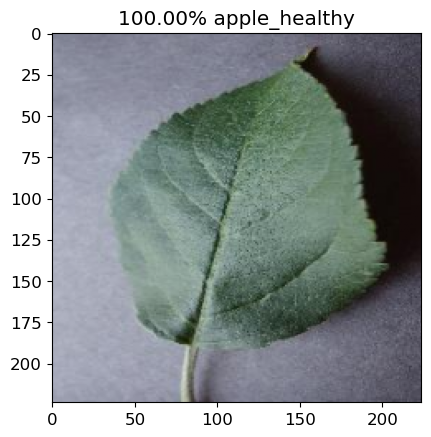

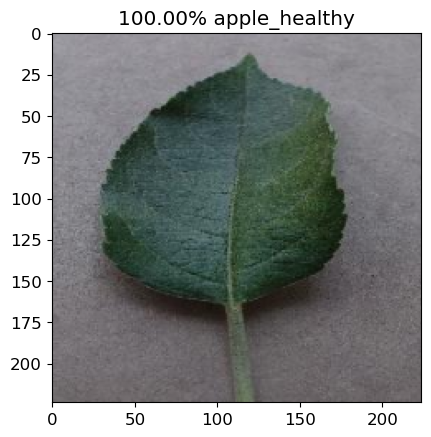

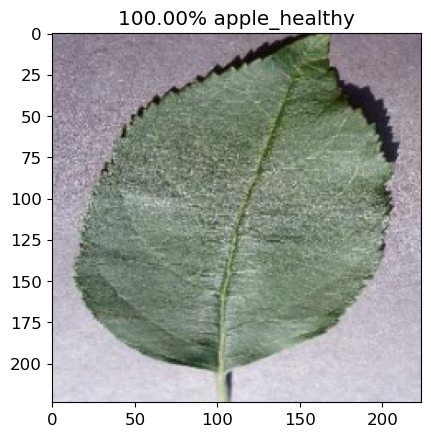

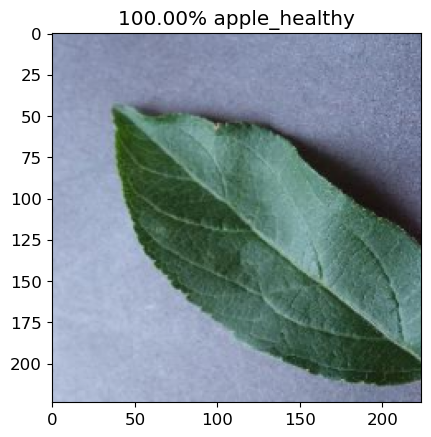

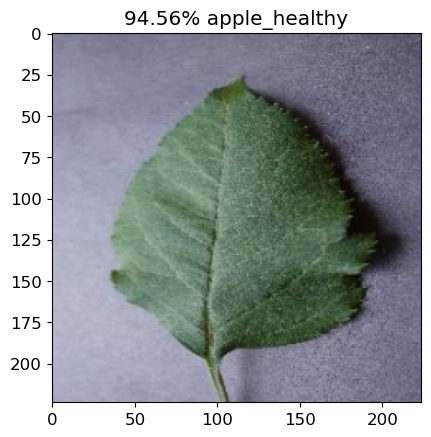

In [96]:
prediction=y_pred[0:5]
for index, probability in enumerate(prediction):
  if probability[1] < 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% apple_Black_rot')
  else:
       # plt.title('%.2f' % ((1-probability[1])*100) + '% apple_healthy')
        plt.title('%.2f' % ((probability[1])*100) + '% apple_healthy')
  plt.imshow(X_test[index])
  plt.show()

In [97]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

### Plot ROC Curve

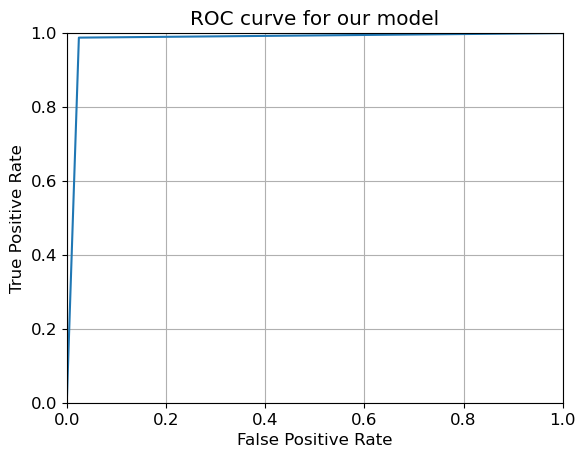

In [98]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### Plot Confusion Matrix

Confusion Matrix without Normalization


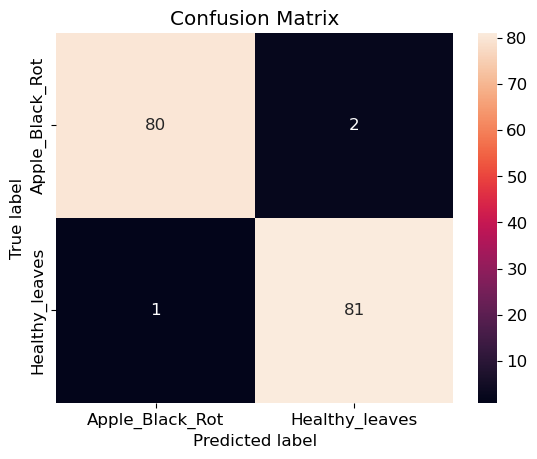

Confusion Matrix with Normalized Values


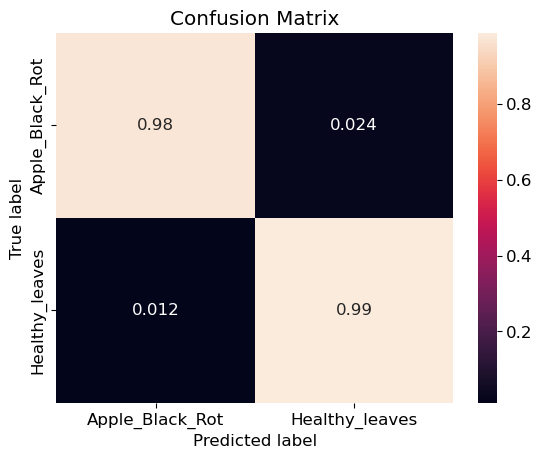

In [99]:
def plot_confusion_matrix(normalize):
  classes = ['Apple_Black_Rot','Healthy_leaves']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

### **Classification Report**

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        82
           1       0.98      0.99      0.98        82

    accuracy                           0.98       164
   macro avg       0.98      0.98      0.98       164
weighted avg       0.98      0.98      0.98       164



### **Accuracy and Loss Plots**

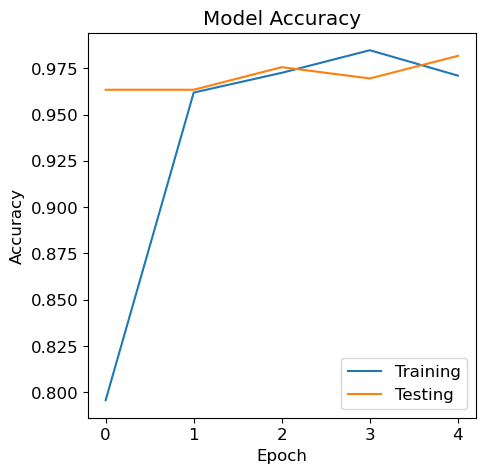

In [101]:
plt.figure(figsize=(5,5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('inception_Apple_leaves_accuracy.png')
plt.show()


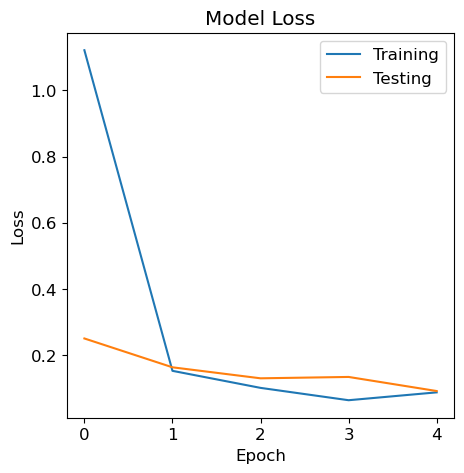

In [102]:
plt.figure(figsize=(5,5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('inception_Apple_leaves_loss.png')
plt.show()